In [1]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
l = os.listdir("image_folder/streaming_image_1")
len(os.listdir("image_folder/streaming_image_2"))

925

In [3]:
len(l)

23359

In [4]:
alt_l = [n for n in l if "png" in n]

In [5]:
len(alt_l)

23119

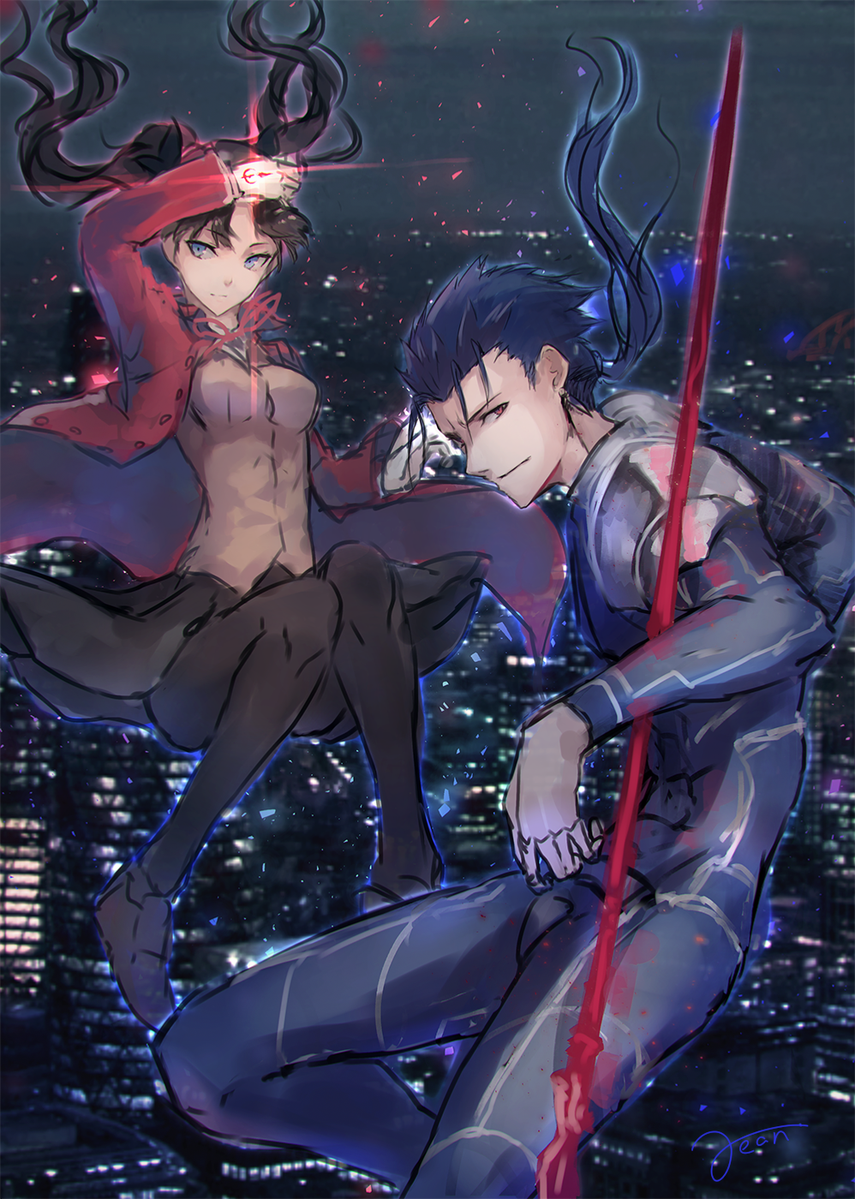

In [32]:
img = Image.open("image_folder/streaming_image_1/{0}".format(alt_l[60]))
img

#### img.size

In [8]:
x_l,y_l,z_l = [],[],[]
for _l in tqdm(alt_l):
    img = Image.open("image_folder/streaming_image_1/{0}".format(_l))
    w = np.array(img).shape
    
    if len(w) == 3:
        x,y,z = w#np.array(img).shape
        x_l.append(x)
        y_l.append(y)
        z_l.append(z)

100%|██████████| 23119/23119 [04:28<00:00, 86.24it/s]


In [9]:
len(x_l)

23099

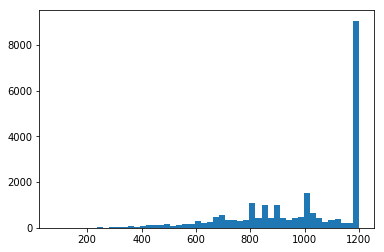

In [10]:
plt.hist(x_l,bins=50)
plt.show()

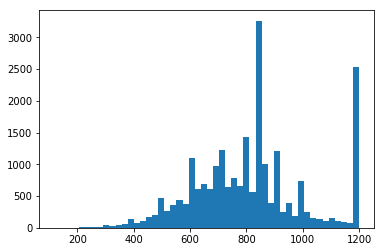

In [11]:
plt.hist(y_l,bins=50)
plt.show()

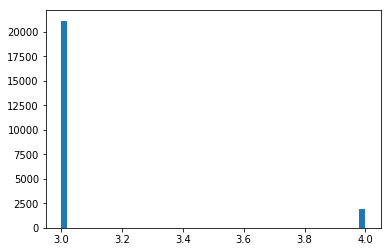

In [12]:
plt.hist(z_l,bins=50)
plt.show()

In [13]:
x_size,y_size,z_size = np.int(np.round(np.mean(x_l))), np.int(np.round(np.mean(y_l))), np.int(np.round(np.mean(z_l)))

In [14]:
x_size,y_size,z_size

(988, 814, 3)

In [42]:
img_list=np.empty((len(alt_l),x_size,y_size,z_size),dtype=np.int8)

In [59]:
#img_list=[]
img_list=np.empty((len(alt_l),z_size, x_size,y_size), dtype=np.int8)

for i, _l in tqdm(enumerate(alt_l)):
    img = Image.open("image_folder/streaming_image_1/{0}".format(_l))
    img = img.resize((x_size,y_size))
    narr = np.array(img)#.shape
    #len(img.mode)
    w = narr.shape
    if len(w) == 3:
        x,y,z = w#np.array(img).shape
        if z == 4:
            img = img.convert("RGB")
            img_list[i] = np.array(img).transpose(2,1,0)  
        else:
            img_list[i] = narr.transpose(2,1,0)
    img.close()

23119it [05:15, 73.17it/s]


In [69]:
#np.save("img_list.npy",img_list)
img_list = np.load("img_list.npy")